# Non-Linear Classification

- In many real life problems, the data is not linearly separable,but we need to classify the data. This can be done using by projecting the data to higer dimesions so that it becomes linearly separable.
<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/linearly_separable.PNG?raw=true" alt="Linear Separable" style="width: 600px;"/>

##  Projecting data to higher dimensions!
When working with non-linear datasets, we can project orginal feature vectors into higher dimensional space where they can be linearly separated!  

### Let us see one example


Data in 2-Dimensional Space
<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/circles_low.png?raw=true" alt="Linear Separable" style="width: 400px;"/>

Data Projected in 3-D Dimensional Space, after processing the original data using a non-linear function.
<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/circles_3d.png?raw=true" alt="Linear Separable" style="width: 400px;"/>

In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D

In [2]:
X,Y = make_circles(n_samples=500, noise=0.02)
print(X.shape, Y.shape)

(500, 2) (500,)


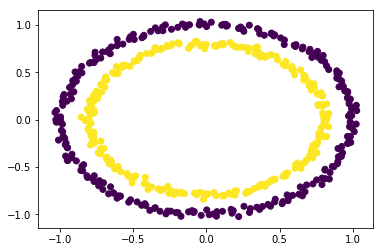

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [4]:
def phi(X):
    """Non linear transformation"""
    x1 = X[:,0]
    x2 = X[:,1]
    x3 = x1**2 + x2**2
    newX = np.zeros((X.shape[0], 3))
    newX[:,:-1] = X
    newX[:,-1] = x3
    return newX

In [5]:
X_ = phi(X)
print(X_[:3])

[[ 0.81996762  0.56731755  0.99419611]
 [-0.9839481   0.19002839  1.00426465]
 [ 0.06600511 -0.80484862  0.65213798]]


In [6]:
def plot3D(X,Y):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=Y, depthshade=True, s=20, zdir='z')
#     plt.show()
    return ax

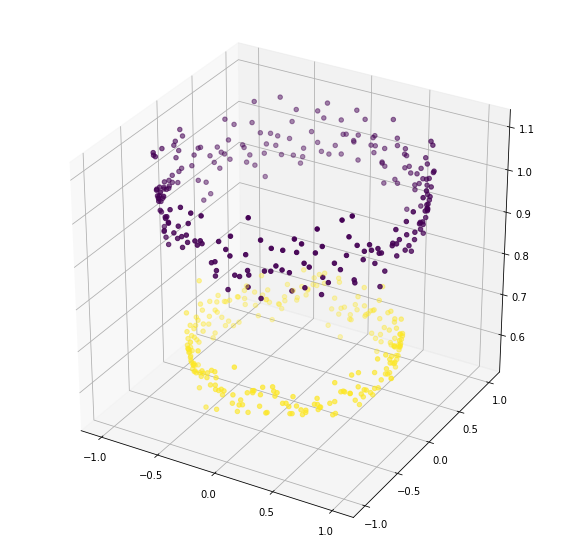

In [7]:
plot3D(X_,Y)

## Logistic Classifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [9]:
lr = LogisticRegression(solver='lbfgs')

In [10]:
# 5 fold cross validation
acc = cross_val_score(lr, X, Y, cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.6000


## Logistic Classifier in Higher Dimensional Space

In [11]:
acc = cross_val_score(lr, X_, Y, cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


## Visualize Decision Surface

In [12]:
lr.fit(X_, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
print(lr.coef_, lr.intercept_)

[[  7.59447456e-03   3.64156718e-02  -1.08957133e+01]] [ 8.92280016]


In [14]:
# Mesh grid
xx, yy = np.meshgrid(range(-2,2), range(-2,2))
# ax + by + cz + d = 0
# z = -(ax + by + d)/c
W = lr.coef_[0]
B = lr.intercept_
z = -(W[0]*xx + W[1]*yy + B)/W[2]
print(z)

[[ 0.81084915  0.81154616  0.81224318  0.81294019]
 [ 0.81419135  0.81488836  0.81558538  0.81628239]
 [ 0.81753355  0.81823056  0.81892758  0.81962459]
 [ 0.82087575  0.82157277  0.82226978  0.8229668 ]]


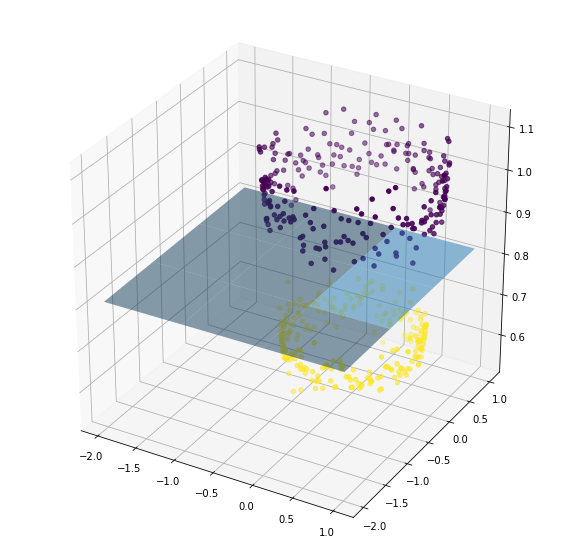

In [15]:
ax = plot3D(X_,Y)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()

## Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.

- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel

**Kernel trick** is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.


In [16]:
from sklearn import svm

### Linear Kernel SVM

In [17]:
svc = svm.SVC(kernel='linear')
svc.fit(X,Y)
print(svc.score(X,Y))

0.504


### RBF Kernel SVM

In [22]:
svc = svm.SVC(kernel='rbf', gamma = 'auto')
svc.fit(X,Y)
print(svc.score(X,Y))

1.0


### Polynomial

In [24]:
svc = svm.SVC(kernel='poly', gamma='auto')
svc.fit(X,Y)
print(svc.score(X,Y))

0.566


### Custom Kernel

In [26]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
print(svc.score(X,Y))

1.0


## Mathematical Formulation
https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation


https://scikit-learn.org/stable/modules/svm.html
